In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6788787066796754194
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10067378176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16113940582091848486
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:13:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
base_dir='../../data/classification/train'

In [4]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_datagen=val_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)




Found 1350 images belonging to 9 classes.
Found 145 images belonging to 9 classes.


In [5]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(9,activation='softmax'))


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(
    train_datagen,
    epochs=300,
    validation_data=val_datagen
)

Epoch 1/300
22/22 [==============================] - 30s 1s/step - loss: 2.1827 - accuracy: 0.1481 - val_loss: 2.1533 - val_accuracy: 0.1586
Epoch 2/300
22/22 [==============================] - 27s 1s/step - loss: 2.1127 - accuracy: 0.1904 - val_loss: 2.0265 - val_accuracy: 0.2690
Epoch 3/300
22/22 [==============================] - 27s 1s/step - loss: 1.8271 - accuracy: 0.3141 - val_loss: 1.6232 - val_accuracy: 0.4207
Epoch 4/300
22/22 [==============================] - 27s 1s/step - loss: 1.4949 - accuracy: 0.4393 - val_loss: 1.2775 - val_accuracy: 0.5724
Epoch 5/300
22/22 [==============================] - 28s 1s/step - loss: 1.3436 - accuracy: 0.4911 - val_loss: 1.1030 - val_accuracy: 0.6552
Epoch 6/300
22/22 [==============================] - 27s 1s/step - loss: 1.2321 - accuracy: 0.5193 - val_loss: 1.0378 - val_accuracy: 0.6138
Epoch 7/300
22/22 [==============================] - 27s 1s/step - loss: 1.2031 - accuracy: 0.5474 - val_loss: 0.9543 - val_accuracy: 0.6759
Epoch 8/300
2

Epoch 59/300
22/22 [==============================] - 27s 1s/step - loss: 0.3652 - accuracy: 0.8689 - val_loss: 0.3865 - val_accuracy: 0.8552
Epoch 60/300
22/22 [==============================] - 27s 1s/step - loss: 0.3743 - accuracy: 0.8726 - val_loss: 0.4398 - val_accuracy: 0.8552
Epoch 61/300
22/22 [==============================] - 27s 1s/step - loss: 0.3660 - accuracy: 0.8644 - val_loss: 0.3980 - val_accuracy: 0.8621
Epoch 62/300
22/22 [==============================] - 27s 1s/step - loss: 0.3438 - accuracy: 0.8785 - val_loss: 0.4127 - val_accuracy: 0.8621
Epoch 63/300
22/22 [==============================] - 27s 1s/step - loss: 0.3426 - accuracy: 0.8763 - val_loss: 0.3934 - val_accuracy: 0.8828
Epoch 64/300
22/22 [==============================] - 27s 1s/step - loss: 0.3533 - accuracy: 0.8807 - val_loss: 0.3840 - val_accuracy: 0.8690
Epoch 65/300
22/22 [==============================] - 27s 1s/step - loss: 0.3675 - accuracy: 0.8733 - val_loss: 0.3962 - val_accuracy: 0.8759
Epoch 

22/22 [==============================] - 27s 1s/step - loss: 0.2865 - accuracy: 0.8889 - val_loss: 0.4284 - val_accuracy: 0.8897
Epoch 117/300
22/22 [==============================] - 27s 1s/step - loss: 0.2685 - accuracy: 0.9096 - val_loss: 0.3049 - val_accuracy: 0.9172
Epoch 118/300
22/22 [==============================] - 27s 1s/step - loss: 0.2317 - accuracy: 0.9237 - val_loss: 0.4181 - val_accuracy: 0.8828
Epoch 119/300
22/22 [==============================] - 27s 1s/step - loss: 0.2317 - accuracy: 0.9185 - val_loss: 0.3484 - val_accuracy: 0.9034
Epoch 120/300
22/22 [==============================] - 31s 1s/step - loss: 0.2773 - accuracy: 0.9074 - val_loss: 0.3626 - val_accuracy: 0.8897
Epoch 121/300
22/22 [==============================] - 27s 1s/step - loss: 0.2393 - accuracy: 0.9200 - val_loss: 0.5753 - val_accuracy: 0.8414
Epoch 122/300
22/22 [==============================] - 27s 1s/step - loss: 0.3369 - accuracy: 0.8830 - val_loss: 0.4420 - val_accuracy: 0.8828
Epoch 123/300

22/22 [==============================] - 27s 1s/step - loss: 0.1800 - accuracy: 0.9304 - val_loss: 0.3272 - val_accuracy: 0.9103
Epoch 174/300
22/22 [==============================] - 27s 1s/step - loss: 0.1570 - accuracy: 0.9415 - val_loss: 0.3389 - val_accuracy: 0.9034
Epoch 175/300
22/22 [==============================] - 27s 1s/step - loss: 0.1535 - accuracy: 0.9422 - val_loss: 0.3508 - val_accuracy: 0.9103
Epoch 176/300
22/22 [==============================] - 27s 1s/step - loss: 0.1930 - accuracy: 0.9370 - val_loss: 0.3165 - val_accuracy: 0.9103
Epoch 177/300
22/22 [==============================] - 27s 1s/step - loss: 0.1599 - accuracy: 0.9393 - val_loss: 0.2891 - val_accuracy: 0.9448
Epoch 178/300
22/22 [==============================] - 27s 1s/step - loss: 0.1648 - accuracy: 0.9437 - val_loss: 0.3075 - val_accuracy: 0.9379
Epoch 179/300
22/22 [==============================] - 27s 1s/step - loss: 0.1568 - accuracy: 0.9452 - val_loss: 0.3744 - val_accuracy: 0.9172
Epoch 180/300

22/22 [==============================] - 27s 1s/step - loss: 0.1724 - accuracy: 0.9370 - val_loss: 0.3798 - val_accuracy: 0.9172
Epoch 231/300
22/22 [==============================] - 27s 1s/step - loss: 0.1357 - accuracy: 0.9496 - val_loss: 0.3322 - val_accuracy: 0.9310
Epoch 232/300
22/22 [==============================] - 27s 1s/step - loss: 0.1434 - accuracy: 0.9593 - val_loss: 0.3735 - val_accuracy: 0.9172
Epoch 233/300
22/22 [==============================] - 27s 1s/step - loss: 0.1444 - accuracy: 0.9452 - val_loss: 0.3589 - val_accuracy: 0.8897
Epoch 234/300
22/22 [==============================] - 27s 1s/step - loss: 0.1115 - accuracy: 0.9570 - val_loss: 0.3474 - val_accuracy: 0.9172
Epoch 235/300
22/22 [==============================] - 27s 1s/step - loss: 0.1096 - accuracy: 0.9563 - val_loss: 0.3325 - val_accuracy: 0.9172
Epoch 236/300
22/22 [==============================] - 27s 1s/step - loss: 0.1090 - accuracy: 0.9622 - val_loss: 0.4145 - val_accuracy: 0.9103
Epoch 237/300

22/22 [==============================] - 28s 1s/step - loss: 0.0799 - accuracy: 0.9704 - val_loss: 0.3721 - val_accuracy: 0.9172
Epoch 288/300
22/22 [==============================] - 28s 1s/step - loss: 0.1164 - accuracy: 0.9556 - val_loss: 0.3195 - val_accuracy: 0.9310
Epoch 289/300
22/22 [==============================] - 28s 1s/step - loss: 0.0866 - accuracy: 0.9704 - val_loss: 0.4267 - val_accuracy: 0.9103
Epoch 290/300
22/22 [==============================] - 27s 1s/step - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.3824 - val_accuracy: 0.9172
Epoch 291/300
22/22 [==============================] - 27s 1s/step - loss: 0.0921 - accuracy: 0.9711 - val_loss: 0.4585 - val_accuracy: 0.9172
Epoch 292/300
22/22 [==============================] - 27s 1s/step - loss: 0.0651 - accuracy: 0.9785 - val_loss: 0.4104 - val_accuracy: 0.9103
Epoch 293/300
22/22 [==============================] - 27s 1s/step - loss: 0.0690 - accuracy: 0.9756 - val_loss: 0.2892 - val_accuracy: 0.9310
Epoch 294/300

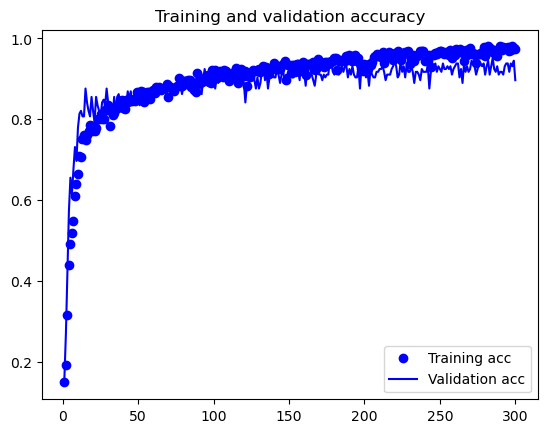

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

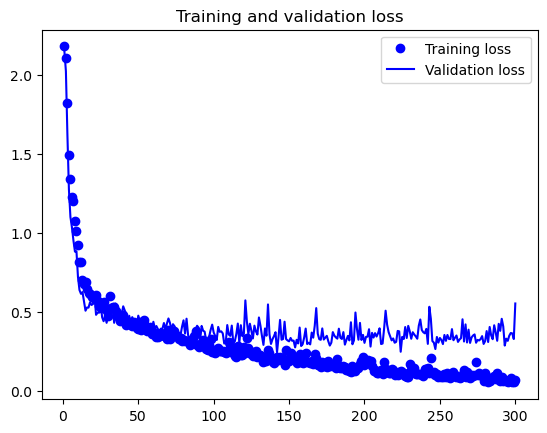

In [9]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
model.save('datesClassification_2.h5')
